In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt    
import seaborn


/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv
/kaggle/input/nasa-nearest-earth-objects/neo.csv


In [2]:
data = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo_v2.csv')
data[:5]

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [3]:
data.hazardous = [1 if each == True else 0 for each in data.hazardous]
data.sentry_object = [1 if each == True else 0 for each in data.sentry_object]
data.orbiting_body = [1 if each == True else 0 for each in data.orbiting_body]

In [4]:
data.drop(['sentry_object', 'orbiting_body', 'id', 'name'], axis = 1, inplace = True)
data[:5]

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


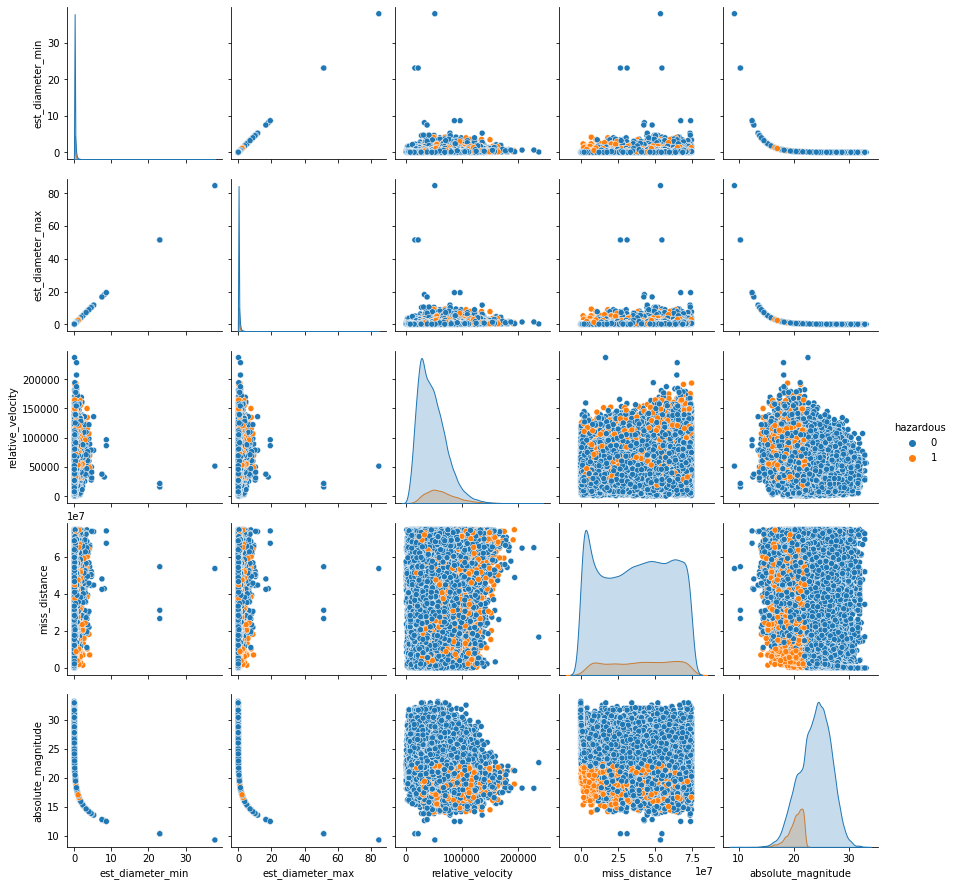

In [5]:
pairplots = seaborn.pairplot(data, vars=["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"], hue = "hazardous")

In [6]:
# Split into x and y
x = data.drop('hazardous' , axis = 1)
y = data.hazardous.astype("int")
print(x.shape, y.shape)
x.head()

(90836, 5) (90836,)


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09


In [7]:
count_zeros = 0
count_ones = 0
for i in range(0,90836):
    if y[i] == 0:
        count_zeros +=1
    else:
        count_ones += 1       
                 

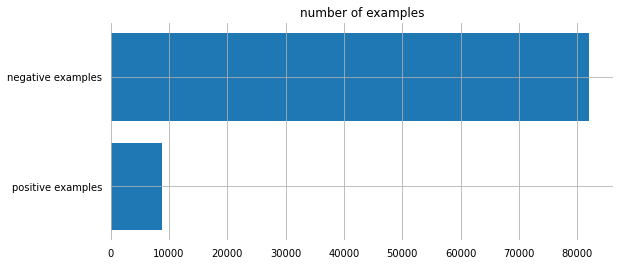

In [8]:
fig, ax = plt.subplots(figsize = (9,4))
plot_data = {'positive examples': count_ones, 'negative examples': count_zeros}
list1 = list(plot_data.keys())
list2 = list(plot_data.values())
ax.barh(list1, list2)

for s in ['top', 'bottom','left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)

ax.grid()

ax.set_title('number of examples', loc = 'center')

plt.show()

In [9]:
#Even though lot shows data bias (We can see that negative examples are more heavily weighed),
#the data is representative of real world, therefore is used as it is for training. To train an svm model
#we need the same amount of positive and negative examples. Otherwise the model will label large points as false negative.


In [10]:
x = (x - np.min(x))/(np.max(x)-np.min(x)).values
x[:20]

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.031607,0.031607,0.056447,0.733141,0.312891
1,0.006999,0.006999,0.309922,0.821364,0.449312
2,0.019039,0.019039,0.481680,0.665740,0.358782
3,0.002531,0.002531,0.103726,0.339986,0.541093
4,0.006714,0.006714,0.179632,0.618634,0.453066
5,0.000943,0.000943,0.143987,0.542558,0.629537
6,0.004513,0.004513,0.115404,0.388576,0.488945
7,0.000125,0.000125,0.242164,0.736821,0.803504
8,0.009231,0.009231,0.238281,0.922951,0.424280
9,0.002777,0.002777,0.203654,0.512736,0.532749


Since est_diameter_max and est_diameter_min is same. Dropping one coloumn and renaming other as diameter_value
*after performing mean normalisation

In [11]:
#Since est_diameter_max and est_diameter_min is same. Dropping one coloumn est_diameter_min
x = data.drop(['est_diameter_min', 'hazardous'], axis = 1)
x.head()

,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,2.679415,13569.249224,5.483974e+07,16.73
1,0.594347,73588.726663,6.143813e+07,20.00
2,1.614507,114258.692129,4.979872e+07,17.83
3,0.215794,24764.303138,2.543497e+07,22.20
4,0.570217,42737.733765,4.627557e+07,20.09


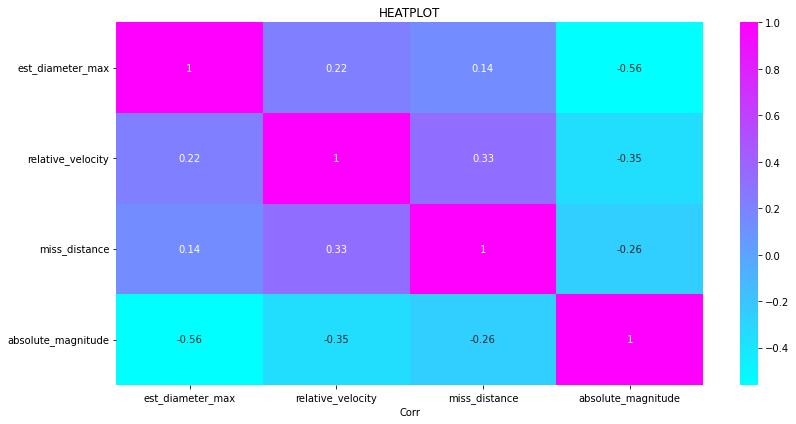

In [12]:
#Plotting correlation heatmap for final comparison 
#before training model

figure = plt.figure(figsize=(12, 6))
#corr plot; cool
seaborn.heatmap(x.corr(), annot=True,cmap=plt.cm.cool)
plt.xlabel('Corr')
plt.title('HEATPLOT')
#tight layout for better readability
plt.tight_layout()
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
y_test[:5]


345      0
81576    1
45390    0
78896    0
36763    0
Name: hazardous, dtype: int64

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


rbf
accuracy, precision
0.9024989908627207
0.0


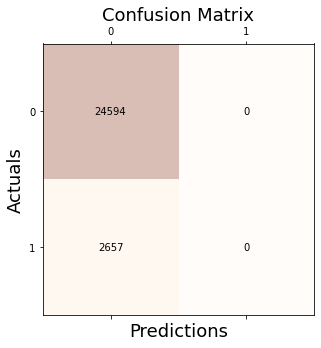

sigmoid
accuracy, precision
0.8267219551576089
0.10088906068805566


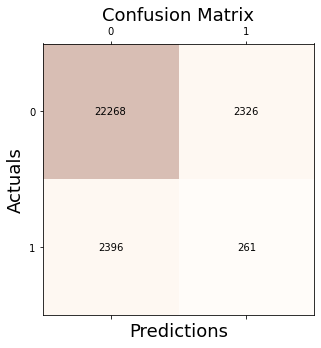

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


poly
accuracy, precision
0.9024989908627207
0.0


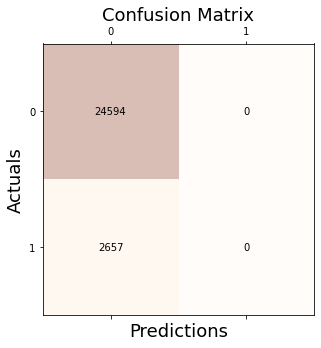

In [15]:
listX = ['rbf','sigmoid', 'poly']
y_true = y_test
for best in listX:
    model = SVC( kernel = best)
    fit_model = model.fit(X_train, y_train)
    model_pred = model.predict(X_test)
    acc = accuracy_score(y_true, model_pred)
    prec = (precision_score(y_true, model_pred))
    print(best)
    print('accuracy, precision')
    print(acc)
    print(prec)
    #print the confusion matrix
    conf_matrix = confusion_matrix(y_true, model_pred)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
            #, size='xx-large')
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    #Acc_model = print('Accuracy with kernel %s: %.3f', %(best, accuracy_score(y_true, model_pred)))
    #prec_model = print('Precision with kernel %s: %.3f', %(best, precision_score(y_true, model_pred)))
    #f1_score = print('f1 sscore with kernel %s: %.3f', %(best,f1_score(y_true, model_pred)))

In [16]:
#linear kernel fails to give any output after long
#duration indicating that the dataset may not be linearly
#seprable.

 **The cell given below does not run.**

In [17]:
    #model = SVC( kernel = 'linear')
    #fit_model = model.fit(X_train, y_train)
    #model_pred = model.predict(X_test)
    #Acc_model = print('linear' + ' Accuracy: %.3f', (accuracy_score(y_true, model_pred)))
    #prec_model = print('linear' + ' Precision:' ,(precision_score(y_true, model_pred)))
    #recll_model = print('linear' + ' Recall: %.3lf',(recall_score(y_true, model_pred)))
    #print(type(prec_model))
    #print(type(recll_model))
    #f1_score = print((prec_model*recll_model)/(prec_model + recll_model))

    #print the confusio matrix
    #conf_matrix = confusion_matrix(y_true, model_pred)

    #fig, ax = plt.subplots(figsize=(5, 5))
    #ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    #for i in range(conf_matrix.shape[0]):
        #for j in range(conf_matrix.shape[1]):
            #ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
            #, size='xx-large')
    #plt.xlabel('Predictions', fontsize=18)
    #plt.ylabel('Actuals', fontsize=18)
    #plt.title('Confusion Matrix', fontsize=18)
    #plt.show()

In [18]:
print('f1_score:')
print('for rbf: 0')
print('for sigmoid: 0.09')
print('for polynomial: 0')
print('linear kernel does not run, and therefore no result')

f1_score:
for rbf: 0
for sigmoid: 0.09
for polynomial: 0
linear kernel does not run, and therefore no result
